# Projet 2 : Concevez une application au service de la santé publique

## Notebook 2 : Exploration des données
Dans ce notebook nous utilisons des données filtrées. Ces données sont issues du notebook 1 qui a pour but de  faire le nettoyage des données. Dans cette partie nous allons exploiter les données afin de voir si l'on peut prédire le nutriscore d'un produit à partir de ses caractéristiques nutritives. Dans un premier temps nous allons faire de l'analyse univarié. Ensuite nous feront une analyse multivarié. Enfin, nous ferons des tests statistiques. Le plan de ce travail est le suivant :
* Analyse univarié
* Analyse multivarié
* Test statistiques

# Analyse univarié

Pour ce travail nous avons besoin des librairies suivantes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#plt.rcParams.update({'font.size': 20})

On charge les données filtrées dans un dataframe.

In [2]:
df = pd.read_csv('data/data_apres_traitement.csv', sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54480 entries, 0 to 54479
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          54480 non-null  int64  
 1   product_name        54480 non-null  object 
 2   countries_en        54480 non-null  object 
 3   additives_n         54480 non-null  float64
 4   nutriscore_score    54480 non-null  float64
 5   nutriscore_grade    54480 non-null  object 
 6   nova_group          54480 non-null  float64
 7   energy-kcal_100g    54480 non-null  float64
 8   fat_100g            54480 non-null  float64
 9   saturated-fat_100g  54480 non-null  float64
 10  carbohydrates_100g  54480 non-null  float64
 11  sugars_100g         54480 non-null  float64
 12  proteins_100g       54480 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 5.4+ MB


## VARIABLES CATEGORIQUES

La variable product_name est difficile a représenter car il y a plus de 50 000 entrées dans le dataframe d'étude. Néanmoins on peut s'intéresser aux produits les plus représentés afin de voir si un produit n'est pas sur représenté. Le graphique ci-dessous montre les 10 produits les plus représentés.

<AxesSubplot:>

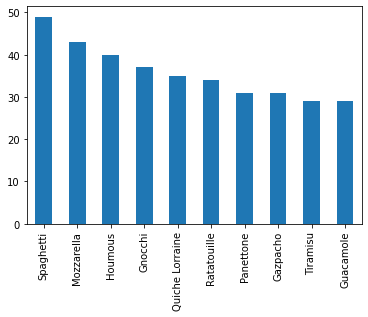

In [4]:
df.loc[:,'product_name'].value_counts().head(10).plot.bar()

Les produits les plus représentés comptabilisent environ 50 entrées ce qui reste très inférieur au total des 50 000 entrées. On peut également vérifier si il y a beaucoup de produits sur représentés.

Text(0, 0.5, 'Produit avec nom identique')

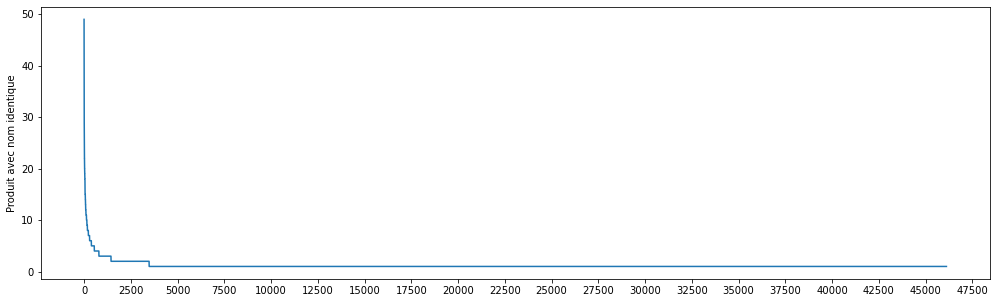

In [5]:
plt.figure(figsize=(17, 5))
plt.plot(np.arange(len(df.loc[:,'product_name'].value_counts())), df.loc[:,'product_name'].value_counts())
plt.locator_params(axis='x', nbins=25)
plt.ylabel('Produit avec nom identique')

On constate avec le graphique ci-dessus que les produits avec un nom identique sont peu représentés.

La variable countries_en permet de donner de l'information sur la provenance des produits. On constate avec le graphique ci-dessous que la majorité des produits utilisés sont français.

<AxesSubplot:>

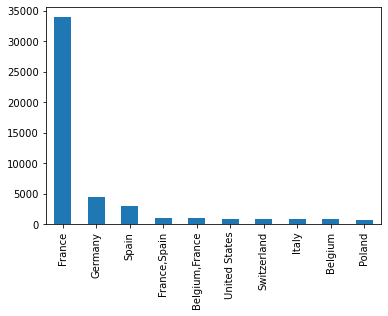

In [6]:
df.loc[:,'countries_en'].value_counts().head(10).plot.bar()

La variable nutriscore_grade représente l'évaluation d'un produit basé sur les qualité nutritives. Le graphique ci-dessous permet de visualiser le nutri-score de l'ensemble des produits.

<AxesSubplot:>

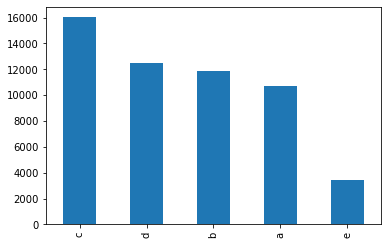

In [7]:
df.loc[:,'nutriscore_grade'].value_counts().plot.bar()

On peut également visualiser cette variable à l'aide d'un pie chart pour avoir une idée des proportions. On constate que les produits avec un nutri-score c sont les plus représentés. Il est également intéressant de noter que les produits avec une note e sont sous représentés.

<AxesSubplot:ylabel='nutriscore_grade'>

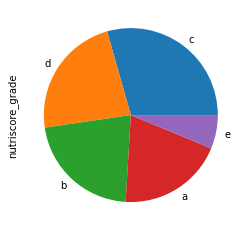

In [8]:
df.loc[:,'nutriscore_grade'].value_counts().plot.pie()

La variable nova_group permet d'évaluer le degré de transformation des aliments. Le graphique ci-dessous montre le nombre d'entrées pour chaque catégorie.

<AxesSubplot:>

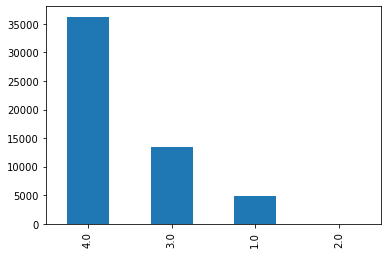

In [9]:
df.loc[:,'nova_group'].value_counts().plot.bar()

On constate que la classe 4 qui correspond aux aliments ultra-transformés est sur représentée. Tandis que la classe 2 qui correspond aux ingrédients culinaires (exemple : le sucre, les huiles végétales, les beurres et graisses animales, le lard, les soupes, le vinaigre, ...) semblent absents.

In [10]:
df.loc[:,'nova_group'].value_counts()

4.0    36239
3.0    13438
1.0     4797
2.0        6
Name: nova_group, dtype: int64

Le graphique ci-dessus permet de voir qu'il y a seulement 6 entrées du groupe 2.

<AxesSubplot:ylabel='nova_group'>

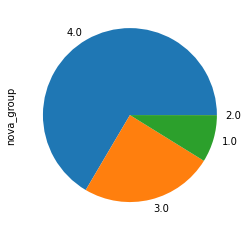

In [11]:
df.loc[:,'nova_group'].value_counts().plot.pie()

Le graphique ci-dessus montre la répartition des produits en fonction de chaque catégorie.

## VARIABLES NUMERIQUES

On peut commencer par étudier la proportion de glucides, protéines et lipides. Le graphique ci-dessous permet de montrer la répartition des valeurs pour les variables carbohydrates_100g, proteins_100g et fat_100g.

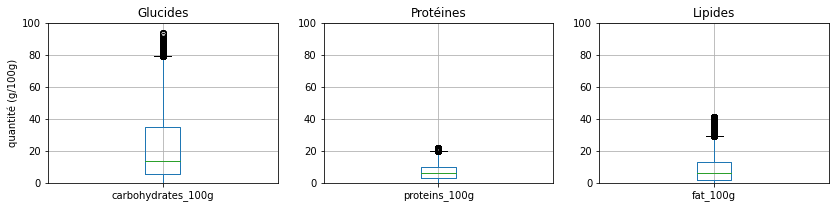

In [12]:
plt.figure(3, figsize=(14, 10))
plt.subplot(331)
df.boxplot(column='carbohydrates_100g')
plt.title('Glucides')
plt.ylabel('quantité (g/100g)')
plt.ylim(0,100)

plt.subplot(332)
df.boxplot(column='proteins_100g')
plt.title('Protéines')
plt.ylim(0,100)

plt.subplot(333)
df.boxplot(column='fat_100g')
plt.title('Lipides')
plt.ylim(0,100)
plt.show()

On constate que les produits étudiés contiennent en général plus de glucides que de protéines et lipides. Il serai intéressant de regarder la proportion de sucre rapides parmi les glucides. Le graphique ci-dessous montre la répartion des sucres à côté de la répartition des glucides.

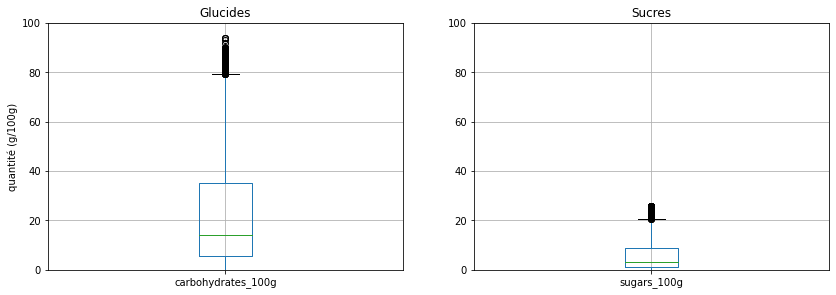

In [13]:
plt.figure(2, figsize=(14, 10))
plt.subplot(221)
df.boxplot(column='carbohydrates_100g')
plt.title('Glucides')
plt.ylabel('quantité (g/100g)')
plt.ylim(0,100)

plt.subplot(222)
df.boxplot(column='sugars_100g')
plt.title('Sucres')
plt.ylim(0,100)
plt.show()

On constate qu'il y a plus de glucides que de sucre. Cela est normal car la quantité de glucides engloble la quantité de sucre. En revanche il semble que la part de sucre dans les glucides ne soit pas majoritaire. On peut regarder les médianes pour avoir une idée cette proportion.

In [14]:
mediane_sucre = np.median(df.loc[:,'sugars_100g'])
mediane_glucide = np.median(df.loc[:,'carbohydrates_100g'])
print(f'mediane_sucre : {mediane_sucre}')
print(f'mediane_glucide : {mediane_glucide}')
print(f'proportion : {round(mediane_sucre/mediane_glucide*100,2)}%')

mediane_sucre : 3.2
mediane_glucide : 14.0
proportion : 22.86%


On peut faire le même exercice avec la matière grasse. Afin de voir la part de matière grasse saturée. Le graphique ci-dessous montre la répartition des variables 

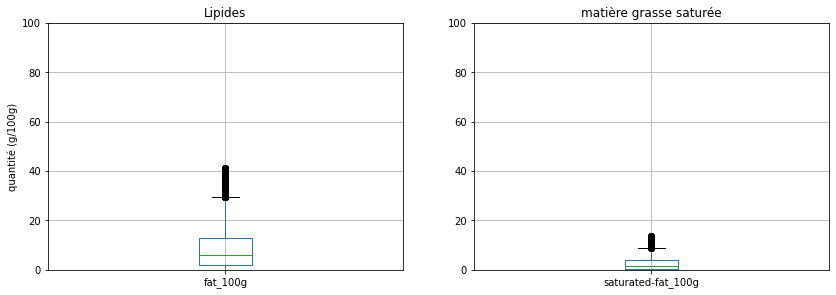

In [15]:
plt.figure(2, figsize=(14, 10))
plt.subplot(221)
df.boxplot(column='fat_100g')
plt.title('Lipides')
plt.ylabel('quantité (g/100g)')
plt.ylim(0,100)

plt.subplot(222)
df.boxplot(column='saturated-fat_100g')
plt.title('matière grasse saturée')
plt.ylim(0,100)
plt.show()

On constate que la quantité de matière grasse saturée est inférieure à la quantité de lipides. Cela est normal car la quantité de lipides inclus la quantité de matière grasse saturée. En revanche on constate que la porportion de matière grasse saturée dans la quantité de lipide est faible. On peut essayer d'évaluer cette proportion avec les médianes. 

In [16]:
mediane_lipide = np.median(df.loc[:,'fat_100g'])
mediane_mgs = np.median(df.loc[:,'saturated-fat_100g'])
print(f'mediane_lipide : {mediane_lipide}')
print(f'mediane_mgs : {mediane_mgs}')
print(f'proportion : {round(mediane_mgs/mediane_lipide*100,2)}%')

mediane_lipide : 5.9
mediane_mgs : 1.7
proportion : 28.81%


On peut s'intéresser à la quantité d'énergie présente dans chaque aliment. Pour donner une représentation la plus fine possible on va tracer un histogramme.

Text(0.5, 0, 'Energie (kcal/100g)')

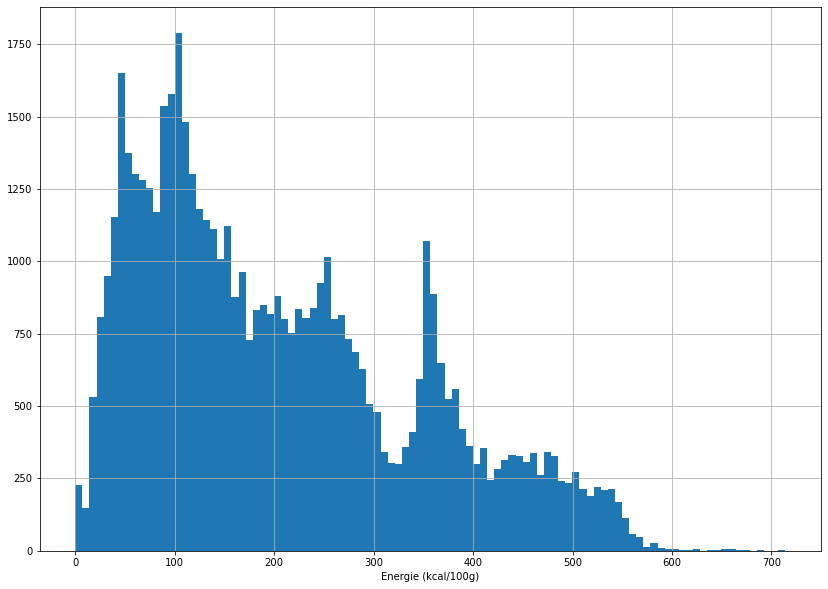

In [17]:
plt.figure(1, figsize=(14, 10))
df.loc[:,'energy-kcal_100g'].hist(bins=100)
plt.xlabel('Energie (kcal/100g)')

On peut représenter également le nutri-score. 

Text(0.5, 0, 'nutri-score')

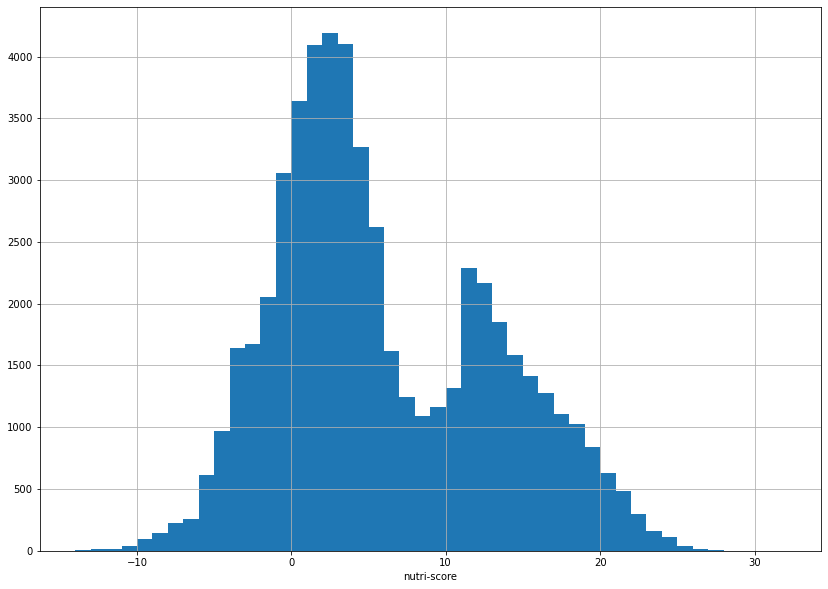

In [18]:
plt.figure(1, figsize=(14, 10))
df.loc[:,'nutriscore_score'].hist(bins=len(df.loc[:,'nutriscore_score'].value_counts()))
plt.xlabel('nutri-score')

Les graphiques ci-dessus sont intéressants car ils montrent la diversité des produits sur la quantité d'énergie et le nutri-score. On imagine facilement que cette distribution est impacté par la catégories des produits. Il va être intéressant à partir de maintenant de faire une analyse multivarié.

# Analyse multivarié

On peut dans un premier temps regarder la proportion d'acide gras saturé en fonction du nova group. Cette étude est intéressante car le nova group caractérise le degré de transformation des aliments. On cherche donc à vérifier si les aliments les plus transformés contiennent le plus d'acide gras saturés.

<AxesSubplot:xlabel='nova_group', ylabel='saturated-fat_100g'>

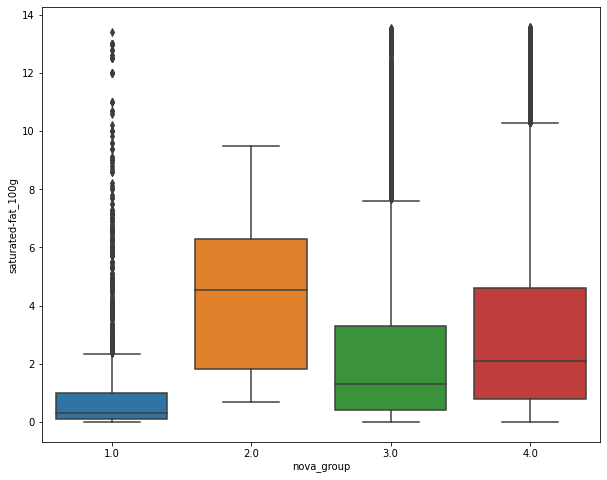

In [19]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'nova_group', y = 'saturated-fat_100g', data = df)

Pour rappel il y a seulement 6 entrées pour le groupe 2 donc il ne faut pas tenir compte du boxplot groupe 2. On constate également que les médianes des groupes 1, 3 et 4 sont ordonnées. Cela montre que les aliments transformés contiennent d'avantage de matières grasses saturés.

On peut également étudier le lien entre la valeur énergétique des aliments et les notes du nutri-score.

<AxesSubplot:xlabel='nutriscore_grade', ylabel='energy-kcal_100g'>

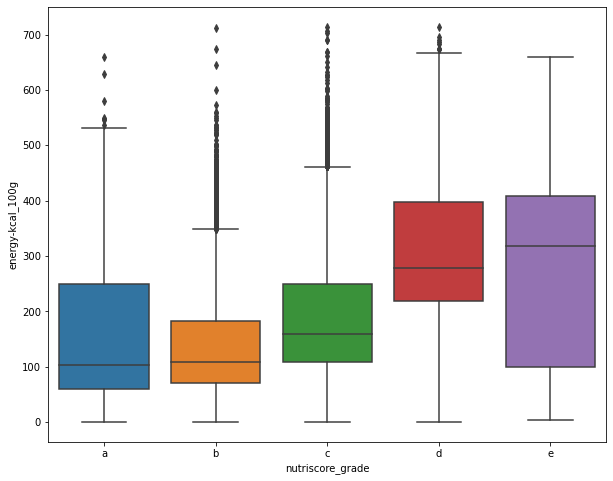

In [20]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'nutriscore_grade', y = 'energy-kcal_100g', data = df.sort_values(['nutriscore_grade']))

Le graphique ci-dessus permet de voir le lien entre nutriscore_grade et energy-kcal_100g. On constate que les médianes sont ordonnées en fonction du nutri-score.

On peut également représenter les variables nutritives en fonction du nutri-score.

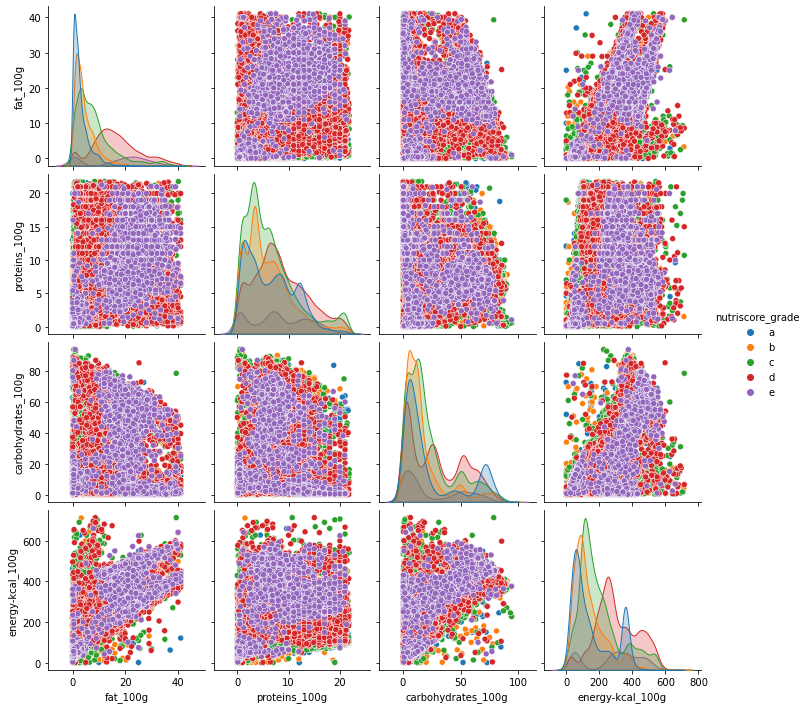

In [21]:
# Ce tri est nécessaire pour afficher les variables et la légende dans l'ordre
df_sort = df.sort_values(by='nutriscore_grade', axis='index')
sns.pairplot(df_sort.loc[:,['fat_100g','proteins_100g','carbohydrates_100g','energy-kcal_100g','nutriscore_grade']], hue='nutriscore_grade')

On constate que le nombre de point à afficher est important, il est donc difficile d'apprendre beaucoup d'informations. On peut néanmoins voir sur les courbes de distribution que les variables fat_100g et energy-kcal_100g que les distributions sont différentes selon la note de nutri-score. On constate également que la relation entre ces deux variables semble linéaire. 

On peut décomposer le graphique fat_100g en fonction de energy-kcal_100g pour chaque groupe.

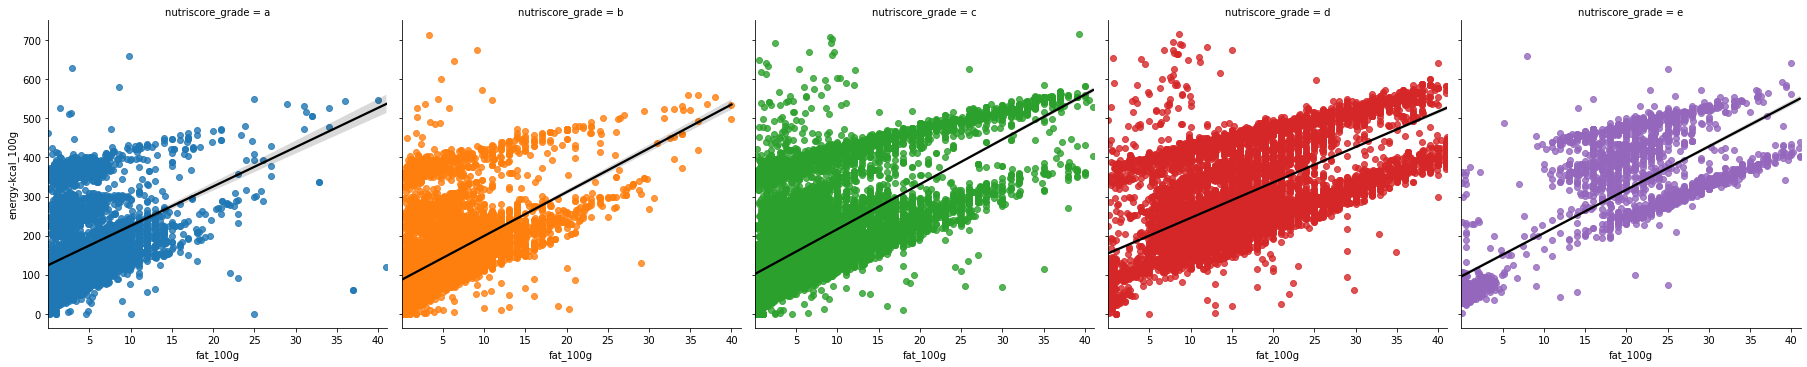

In [22]:
sns.lmplot(data=df_sort,x='fat_100g', y='energy-kcal_100g', hue='nutriscore_grade', col='nutriscore_grade',line_kws={'color': 'black'})

Ce graphique montre que la droite de regression linéaire est identique pour chaque note de nutriscore. Cela s'explique par le fait que les matières grasses sont responsables d'une partie importante des calories dans un aliment. On constate qu'il semble y avoir des limites de valeur énergétique pour une quantité de matière grasse donnée. La partie la plus intéressante de ce graphique est qu'en fonction de la note de nutri-score les points sont regroupés différement. Cela signifique que le couple de varible fat_100g et energy-kcal_100g peuvent être utilisées pour prédire la note de nutri-score.

# Test statistiques

On va dans la suite de cette étude chercher à vérifier la relation entre deux variables à l'aide de test statistiques. L'intérêt d'un test statistique est de pouvoir valider ou réfuter des hypothèses avec un niveau de risque que l'on va fixer.

## Test de corrélation de Pearson

Le coefficient de Pearson mesure la corrélation entre 2 variables X et Y. Ce test de corrélation requière pour chaque variable une distribution normale. Le coefficient de corrélation varie entre -1 et +1 avec 0 indiquant aucune corrélation. 

+1 indique une relation linéaire entre X et Y avec un coefficient positif, c'est-à-dire lorsque X augmente Y augmente. 

-1 indique une relation linéaire entre X et Y avec un coefficient négatif, c'est-à-dire lorsque X augmente Y diminue.

Pour une p-value peut-être calculée, elle indique approximativement la probabilité d'un système non corrélé de produire des échantillons ayant une corrélation de Pearson au moins aussi extrème que celle calculée sur l'échantillon étudié. La p-value pour ce test n'est pas entièrement fiable mais est raisonnable pour des échantillon de plus de 500 entrées.

source : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.pearsonr.html

D'un point de vue mathématique le coefficient de Pearson est exprimé de la facon suivante : 

$$\text{pearson_coeff} = \frac{cov(X,Y)}{\sigma{}_X\sigma{}_Y}$$

Que l'on peut écrire également,

$$\text{pearson_coeff} = \frac{\mathbb{E}[(X - \mu{}_X)(Y - \mu{}_Y)]}{\sigma{}_X\sigma{}_Y}$$

Avec,

$\mu{}_X$ : moyenne de X

$\mu{}_Y$ : moyenne de Y

Pour un échantillon la formule à utiliser est :

$$\text{pearson_coeff} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

Avec,

$\bar{x}$ : moyenne de X sur l'échantillon 

$\bar{y}$ : moyenne de Y sur l'échantillon 

source : https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

vidéos explicatives : covariance : part 1 : https://www.youtube.com/watch?v=qtaqvPAeEJY
                                 : part 2 : https://www.youtube.com/watch?v=xZ_z8KWkhXE

<AxesSubplot:>

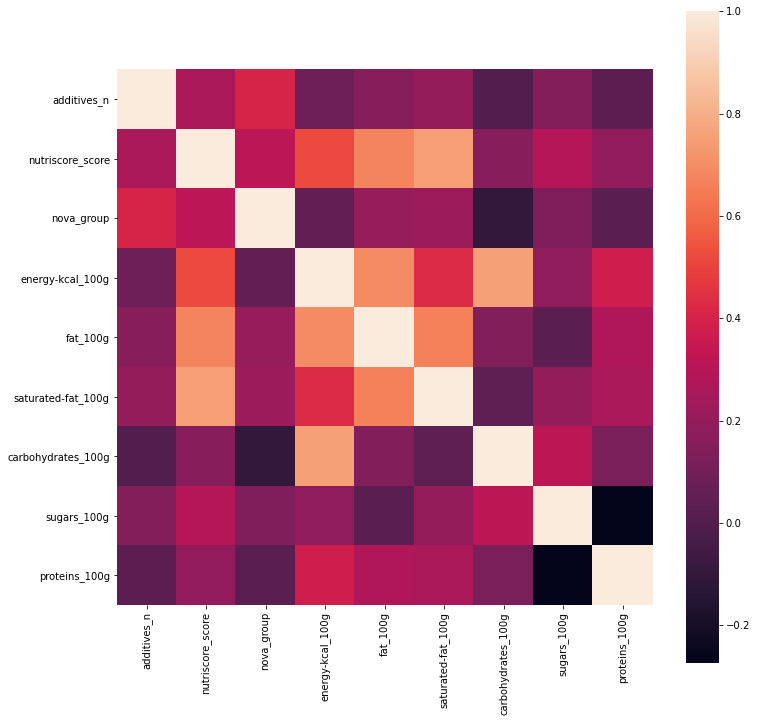

In [23]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr(method='pearson')
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

Formulation des hypothèses

H0 : Les variables X et Y sont indépendantes

H1 : Les variables X et Y ne sont pas indépendantes

In [24]:
from scipy.stats import pearsonr
X = df.loc[:,'nutriscore_score'].values
Y = df.loc[:,'energy-kcal_100g'].values
pearson_coeff, p_value = pearsonr(X, Y)
print(f'coefficient de Pearson = {pearson_coeff:.7f}')
print(f'p-value = {p_value:.7f}')
      
if p_value > 0.05:
    print('Les variables sont indépendantes')
else:
    print('Les variables ne sont pas indépendantes')

coefficient de Pearson = 0.5186350
p-value = 0.0000000
Les variables ne sont pas indépendantes


In [25]:
X = df.loc[:,'nutriscore_score'].values
Y = df.loc[:,'saturated-fat_100g'].values
pearson_coeff, p_value = pearsonr(X, Y)
print(f'coefficient de Pearson = {pearson_coeff:.7f}')
print(f'p-value = {p_value:.7f}')
      
if p_value > 0.05:
    print('Les variables sont indépendantes')
else:
    print('Les variables ne sont pas indépendantes')

coefficient de Pearson = 0.7467730
p-value = 0.0000000
Les variables ne sont pas indépendantes


In [26]:
X = df.loc[:,'fat_100g'].values
Y = df.loc[:,'proteins_100g'].values
pearson_coeff, p_value = pearsonr(X, Y)
print(f'coefficient de Pearson = {pearson_coeff:.7f}')
print(f'p-value = {p_value:.7f}')
      
if p_value > 0.05:
    print('Les variables sont indépendantes')
else:
    print('Les variables ne sont pas indépendantes')

coefficient de Pearson = 0.2775703
p-value = 0.0000000
Les variables ne sont pas indépendantes


Voyons ce que donne le test de Pearson sur deux variables indépendantes suivant une loi normale pour une taille d'échantillon similaire.

In [27]:
X = np.random.normal(0,1,50000)
Y = np.random.normal(0,1,50000)

/home/hugo/anaconda3/envs/projet2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/envs/projet2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


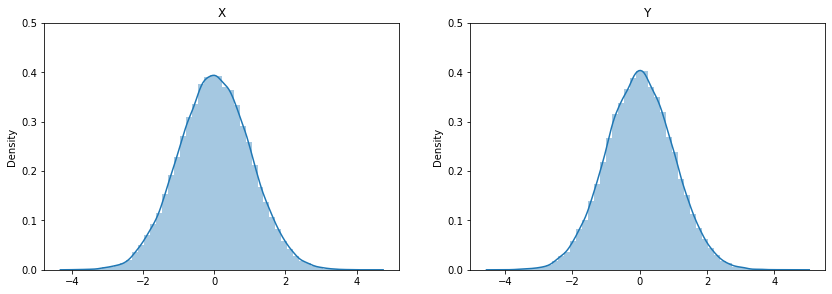

In [28]:
plt.figure(2, figsize=(14, 10))
plt.subplot(221)
sns.distplot(X)
plt.title('X')
plt.ylim(0,0.5)

plt.subplot(222)
sns.distplot(Y)
plt.title('Y')
plt.ylim(0,0.5)
plt.show()

In [29]:
pearson_coeff, p_value = pearsonr(X, Y)
print(f'coefficient de Pearson = {pearson_coeff:.7f}')
print(f'p-value = {p_value:.7f}')
      
if p_value > 0.05:
    print('Les variables sont indépendantes')
else:
    print('Les variables ne sont pas indépendantes')

coefficient de Pearson = 0.0033982
p-value = 0.4473486
Les variables sont indépendantes


Le test de Pearson est couramment utilisé même lorsque les variables ne suivent pas une loi normale. Il est plus rigoureux de tester dans un premier temps la loi de distribution puis ensuite d'utiliser un autre type de test si la loi de distribution n'est pas vérifiée. Les tests que l'on peut utiliser pour l'étude de la loi de distribution sont par exemple le test de Kolmogorov-Smirnov ou bien Shapiro-Wilk.

## Test de Kolmogorov-Smirnov

Le test de Kolmogorov-Smirnov est utilisé afin de vérifier la distribution suit une loi de probabilité donnée. l'idée est de comparer la distribution empirique avec une distribution donnée et de mesurer l'écart.

explication du test : http://jybaudot.fr/Inferentielle/kolmogorov.html

Formulation des hypothèses

H0 : Les variables X et Y suivent la même loi de distribution

H1 : Les variables X et Y ne suivent pas la même loi de distribution

In [30]:
from scipy.stats import ks_2samp
X = df.loc[:,'nutriscore_score'].values
Y = list(np.random.normal(np.mean(X), np.std(X), len(X)))
KS_coeff, p_value = ks_2samp(X, Y)
print(f'coefficient de Kolmogorov-Smirnov = {KS_coeff:.7f}')
print(f'p-value = {p_value:.7f}')

if p_value > 0.05:
    print('La variable X suit une loi normale')
else:
    print('La variable X ne suit pas une loi normale')

coefficient de Kolmogorov-Smirnov = 0.1356828
p-value = 0.0000000
La variable X ne suit pas une loi normale


In [31]:
X = np.random.normal(0,1,50000)
Y = np.random.normal(0,1,50000)

KS_coeff, p_value = ks_2samp(X, Y)
print(f'coefficient de Kolmogorov-Smirnov = {KS_coeff:.7f}')
print(f'p-value = {p_value:.7f}')
      
if p_value > 0.05:
    print('La variable X suit une loi normale')
else:
    print('La variable X ne suit pas une loi normale')

coefficient de Kolmogorov-Smirnov = 0.0066000
p-value = 0.2252173
La variable X suit une loi normale


Le test de Kolmogorov-Smirnov a montré que la variable nutriscore ne suit pas une distribution normale. Cela signifie que le test de Pearson n'était pas adapté pour déterminer la corrélation entre la variable nutriscore et energy-kcal. On va donc réaliser un autre test de corrélation n'ayant pas de contraintes sur la distribution des variables.

## Test de corrélation de  Spearman

Le test de corrélation de Spearman contrairement au test de Pearson ne cherche pas une relation linéaire entre les variables.

Formulation des hypothèses

H0 : Les variables X et Y sont indépendantes

H1 : Les variables X et Y ne sont pas indépendantes

In [32]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
X = df.loc[:,'nutriscore_score'].values
Y = df.loc[:,'energy-kcal_100g'].values
spearman_coeff, p_value = spearmanr(X, Y)
print(f'coefficient de Spearman = {spearman_coeff:.7f}')
print(f'p-value = {p_value:.7f}')
      
if p_value > 0.05:
    print('Les variables X et Y sont indépendantes')
else:
    print('Les variables X et Y ne sont pas indépendantes')

coefficient de Spearman = 0.4988557
p-value = 0.0000000
Les variables X et Y ne sont pas indépendantes


On peut également visualiser les coefficients de spearman pour l'ensemble des variables numériques.

<AxesSubplot:>

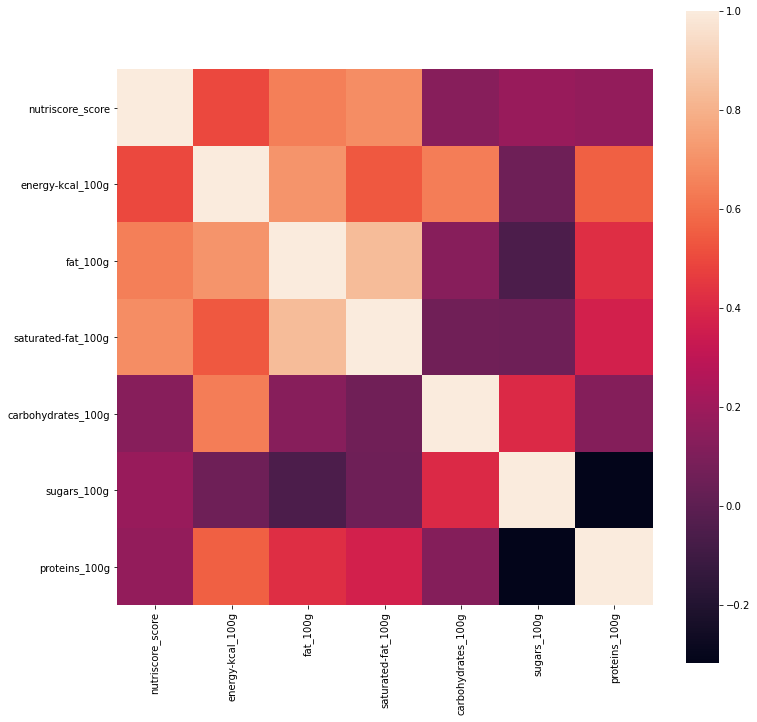

In [33]:
corr = df.loc[:,['nutriscore_score','energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g']].corr(method='spearman')
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

## Test Analyse de la variance (ANOVA)

Le test ANOVA permet d'étudier la relation entre une variable catégorique et une variable numérique. 

Hypothèses fondamentales :
* On suppose, sous l'hypothèse nulle, que les échantillons sont issus d'une même population et suivent une loi normale
* On suppose que chaque échantillon analysé est indépendant des autres échantillons

Formulation des hypothèses

H0 : Les moyennes des échantillons sont identiques

H1 : Les moyennes des échantillons ne sont pas identiques 

source : https://fr.wikipedia.org/wiki/Analyse_de_la_variance

On créé une fonction pour faire la sélection des échantillons.

In [34]:
def dataSelection(df,variable,grade):
    df_copy = df.copy()
    index_logic = df_copy.loc[:,'nutriscore_grade'] == grade
    return df_copy.loc[index_logic,variable].values

In [35]:
energy_a = dataSelection(df,'energy-kcal_100g','a')
energy_b = dataSelection(df,'energy-kcal_100g','b')
energy_c = dataSelection(df,'energy-kcal_100g','c')
energy_d = dataSelection(df,'energy-kcal_100g','d')
energy_e = dataSelection(df,'energy-kcal_100g','e')

On visualise les échantillons pour vérifier qu'ils sont proches en terme de distribution.

/home/hugo/anaconda3/envs/projet2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/envs/projet2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/envs/projet2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

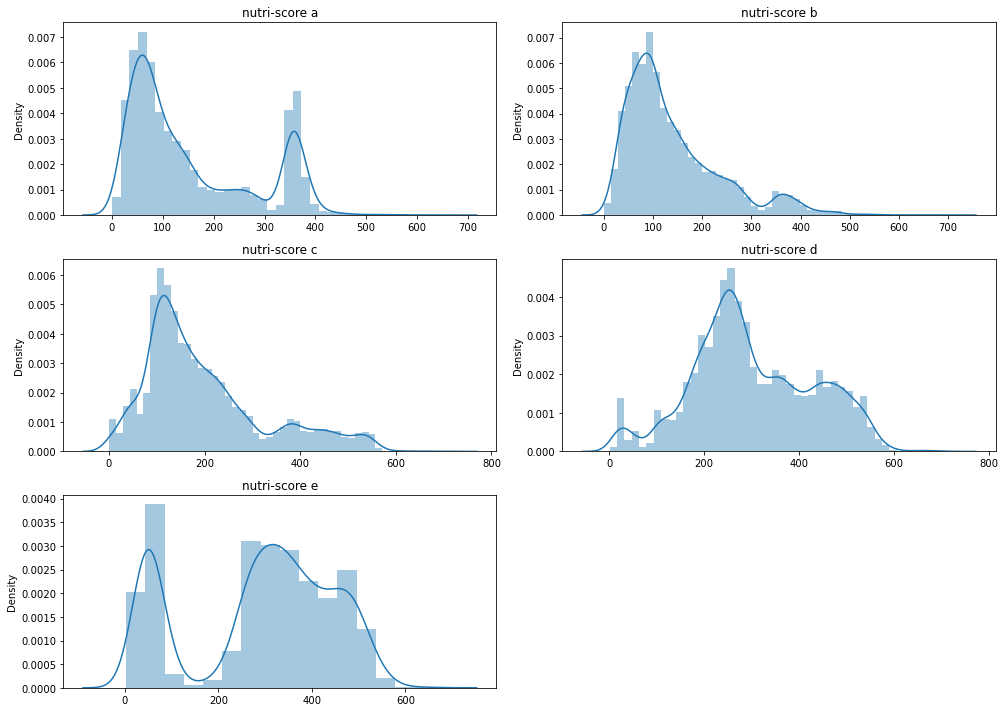

In [36]:
plt.figure(5, figsize=(14, 10))
data_list = [energy_a, energy_b, energy_c, energy_d, energy_e]
list_label = ['nutri-score a', 'nutri-score b', 'nutri-score c', 'nutri-score d', 'nutri-score e']
for i in [1,2,3,4,5]:
    plt.subplot(3,2,i)
    sns.distplot(data_list[i-1])
    plt.title(list_label[i-1])
    
plt.tight_layout()
plt.show()

On applique ensuite le test ANOVA.

In [37]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
stat, p = f_oneway(energy_a, energy_b, energy_c, energy_d, energy_e)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Les moyennes des échantillons sont identiques')
else:
	print('Les moyennes des échantillons ne sont pas identiques')

stat=3669.646, p=0.000
Les moyennes des échantillons ne sont pas identiques


Le test ANOVA nous permet de dire que lorsque l'on fait des échantillons de données de valeur énergétique en fonction de la note nutri-score on obtient des échantillons différents. En d'autres termes il est possible d'utiliser la variable energy-kcal_100g pour prédire la note de nutri-score.

On peut également faire ce travail entre les variables fat_100g et nutriscore_grade afin de voir si on peut utiliser la variable fat_100g pour prédire la note de nutri-score.

In [38]:
fat_a = dataSelection(df,'fat_100g','a')
fat_b = dataSelection(df,'fat_100g','b')
fat_c = dataSelection(df,'fat_100g','c')
fat_d = dataSelection(df,'fat_100g','d')
fat_e = dataSelection(df,'fat_100g','e')

On visualise les échantillons pour vérifier qu'ils sont proches en terme de distribution.

/home/hugo/anaconda3/envs/projet2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/envs/projet2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/envs/projet2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

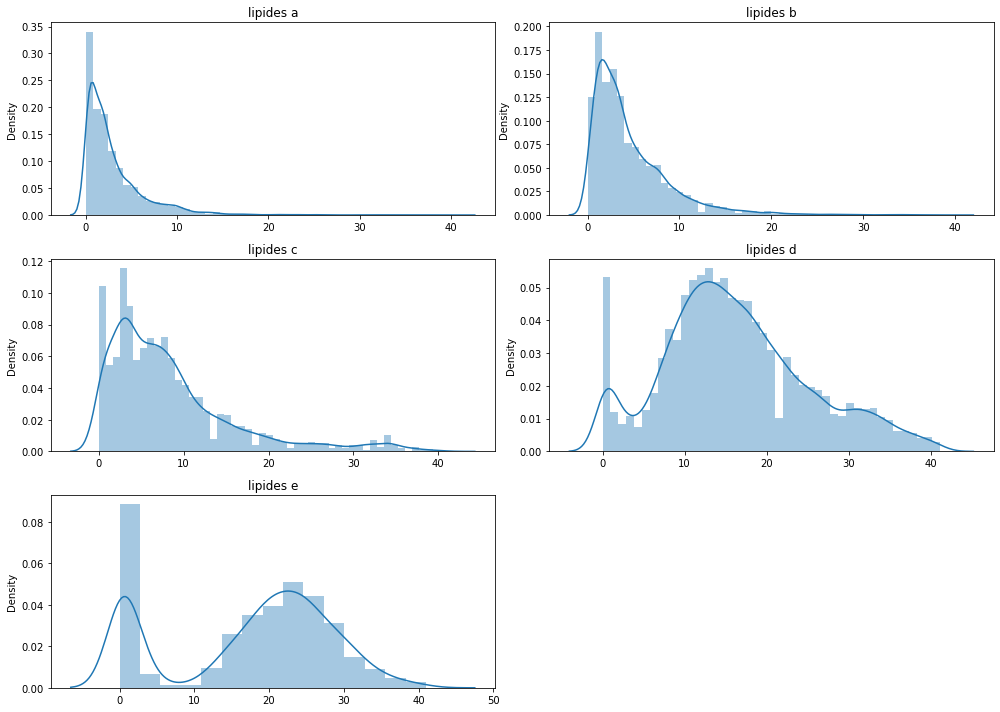

In [39]:
plt.figure(5, figsize=(14, 10))
data_list = [fat_a, fat_b, fat_c, fat_d, fat_e]
list_label = ['lipides a', 'lipides b', 'lipides c', 'lipides d', 'lipides e']
for i in [1,2,3,4,5]:
    plt.subplot(3,2,i)
    sns.distplot(data_list[i-1])
    plt.title(list_label[i-1])
    
plt.tight_layout()
plt.show()

In [40]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
stat, p = f_oneway(fat_a, fat_b, fat_c, fat_d, fat_e)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Les moyennes des échantillons sont identiques')
else:
	print('Les moyennes des échantillons ne sont pas identiques')

stat=7666.017, p=0.000
Les moyennes des échantillons ne sont pas identiques


Cela signifie que la variable fat_100g peut être utilisée pour prédire le nutri-score.